In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
population=pd.read_csv('dataset/delhi-population.csv')
population.head()

,population,year,growth,growthRate
0,1369370,1950,0,0.000000
1,1461150,1951,91780,0.067024
2,1535520,1952,74370,0.050898
3,1613450,1953,77930,0.050752
4,1695450,1954,82000,0.050823


In [4]:
# selected_population=population.loc[population['year']>2000:population['year']<2024]
# selected_population.head()

# population.dtypes

selected_population = population[(population['year'] >= 2000) & (population['year'] <= 2024)]
selected_population.head()

,population,year,growth,growthRate
50,15691900,2000,786400,0.052759
51,16413700,2001,721800,0.045998
52,16955600,2002,541900,0.033015
53,17515500,2003,559900,0.033022
54,18094700,2004,579200,0.033068


In [46]:
(16413700-15691900)/16413700

0.04397545952466537

In [5]:
selected_population.isna().sum()

population    0
year          0
growth        0
growthRate    0
dtype: int64

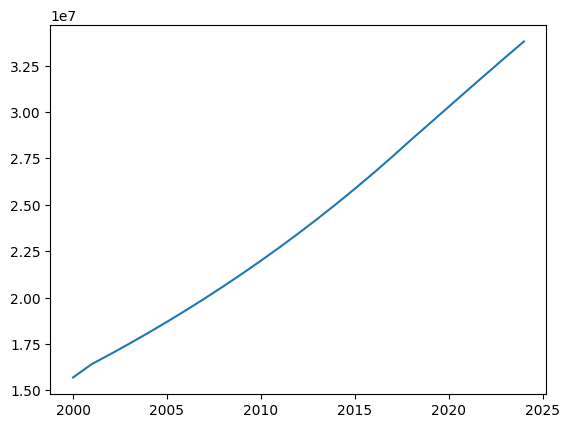

In [6]:
x=selected_population['year']
y=selected_population['population']

plt.plot(x,y)
plt.show()

In [7]:
selected_population['year']=pd.to_datetime(selected_population['year'],format='%Y')

C:\Users\ariel\AppData\Local\Temp\ipykernel_7660\1919355588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_population['year']=pd.to_datetime(selected_population['year'],format='%Y')


In [8]:
selected_population.dtypes

population             int64
year          datetime64[ns]
growth                 int64
growthRate           float64
dtype: object

In [9]:
selected_population.head()

,population,year,growth,growthRate
50,15691900,2000-01-01,786400,0.052759
51,16413700,2001-01-01,721800,0.045998
52,16955600,2002-01-01,541900,0.033015
53,17515500,2003-01-01,559900,0.033022
54,18094700,2004-01-01,579200,0.033068


In [10]:
# Set the 'year' column as the index
selected_population.set_index('year', inplace=True)

# Resample the data to hourly frequency and interpolate
hourly_population = selected_population['population'].resample('H').interpolate(method='linear')

hourly_population.head()


C:\Users\ariel\AppData\Local\Temp\ipykernel_7660\2151467112.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_population = selected_population['population'].resample('H').interpolate(method='linear')


year
2000-01-01 00:00:00    1.569190e+07
2000-01-01 01:00:00    1.569198e+07
2000-01-01 02:00:00    1.569206e+07
2000-01-01 03:00:00    1.569215e+07
2000-01-01 04:00:00    1.569223e+07
Freq: h, Name: population, dtype: float64

In [11]:
hourly_population.to_csv('dataset/hourly_population.csv')